<a href="https://colab.research.google.com/github/AnjaliKrishna123/Project/blob/main/Nutrition_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import required libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import numpy as np
#pip install pandas
#import pandas as pd
#pip install numpy
#import numpy as np
#pip install matplotlib
import matplotlib.pyplot as plt
#pip install seaborn
import seaborn as sns
#pip install scikit-learn
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#reading the file
data=pd.read_csv("diabetes.csv")

In [3]:
#checking the number of rows and columns in the file
data.shape

(768, 9)

In [4]:
#checking for null values in the data
data.isnull().values.any()

False

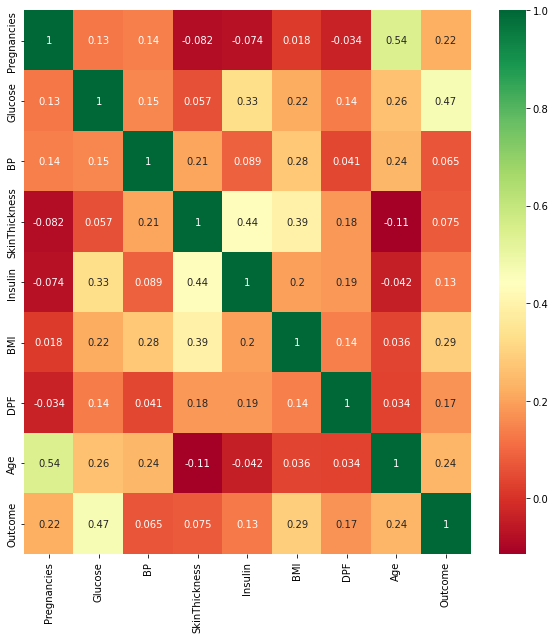

In [5]:
#renaming big coloums name
data.rename(columns={'DiabetesPedigreeFunction':'DPF','BloodPressure':'BP'},inplace=True)
data.head(5)

data.describe()

corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [6]:
#plotting correlation graph
data.corr()

print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Pedigree Function : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])

data["Glucose"]=data["Glucose"].replace(0,data["Glucose"].mean())
data["BP"]=data["BP"].replace(0,data["BP"].mean())
data["SkinThickness"]=data["SkinThickness"].replace(0,data["SkinThickness"].mean())
data["Insulin"]=data["Insulin"].replace(0,data["Insulin"].mean())
data["BMI"]=data["BMI"].replace(0,data["BMI"].mean())
data["DPF"]=data["DPF"].replace(0,data["DPF"].mean())
data["Age"]=data["Age"].replace(0,data["Age"].mean())


Number of zeros in Glocose :  5
Number of zeros in Blood Pressure :  35
Number of zeros in Skin Thickness :  227
Number of zeros in Insulin :  374
Number of zeros in BMI :  11
Number of zeros in Diabetes Pedigree Function :  0
Number of zeros in Age :  0


In [7]:
#cleaning the data
print("Number of zeros in Glocose : ",data[data["Glucose"]==0].shape[0])
print("Number of zeros in Blood Pressure : ",data[data["BP"]==0].shape[0])
print("Number of zeros in Skin Thickness : ",data[data["SkinThickness"]==0].shape[0])
print("Number of zeros in Insulin : ",data[data["Insulin"]==0].shape[0])
print("Number of zeros in BMI : ",data[data["BMI"]==0].shape[0])
print("Number of zeros in Diabetes Prediction Factor : ",data[data["DPF"]==0].shape[0])
print("Number of zeros in Age : ",data[data["Age"]==0].shape[0])

Number of zeros in Glocose :  0
Number of zeros in Blood Pressure :  0
Number of zeros in Skin Thickness :  0
Number of zeros in Insulin :  0
Number of zeros in BMI :  0
Number of zeros in Diabetes Prediction Factor :  0
Number of zeros in Age :  0


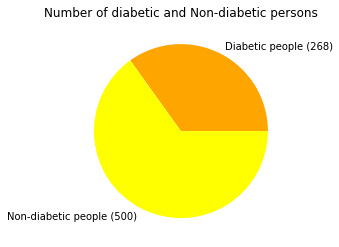

In [8]:
#counting the total individual Outcomes
positive_outcome=len(data.loc[data["Outcome"]==1])
negative_outcome=len(data.loc[data["Outcome"]==0])
(positive_outcome,negative_outcome)

y=np.array([positive_outcome,negative_outcome])
mylabels=["Diabetic people (268)","Non-diabetic people (500)"]
plt.pie(y,labels=mylabels,colors=["orange","yellow"])
plt.title("Number of diabetic and Non-diabetic persons")
plt.show()

In [9]:
X=data.drop(columns=["Outcome"])
Y=data["Outcome"]
X_test,X_train,Y_test,Y_train=train_test_split(X,Y,test_size=0.30,random_state=10)
model=RandomForestClassifier(random_state=10)
model.fit(X_train,Y_train.ravel())
pred=model.predict(X_test)
pred
acc=metrics.accuracy_score(Y_test,pred)
print("\n\n ACCURACY OF THE MODEL : ",acc)
print("\n")
def prediction_calculator(n):
    for i in range(n):
        print("\nENTER THE DETAILS FOR PERSON : ",(i+1))
        Gender_ip=input("\nGENDER M/F/m/f: ")
        if(Gender_ip=="M" or Gender_ip=="m"):
            Preg_ip=0
        else:
            Preg_ip=input("Number of Pregnancies : ")
        Age_ip=input("Age : ")
        Bmi_ip=input("BMI : ")
        Glucose_ip=input("Glucose level : ")
        Insulin_ip=input("Insulin level : ")
        Bp_ip=input("BP level : ")
        St_ip=input("Skin Thickness : ")
        Dpf_ip=input("Diabetes pedigree function : ")



 ACCURACY OF THE MODEL :  0.750465549348231




In [10]:
df = pd.read_csv('mock_data.csv')
properties = list(df.columns.values)
properties.remove('Category')

y = df['Category']
c = [p for p in range(len(y))]
    
m_data = pd.DataFrame(np.zeros((len(y),len(properties))),columns=properties,index=c)

for i in range(df.shape[0]):
    for p in properties:
        data = df.iloc[i][p]
        if type(data) == str:
            print("We got a string, should not happen")
            data = np.float64(data.replace(',',''))
            if np.isnan(data):
                #outcome = df.iloc[i]['Category']
                cleanData(m_data,p,outcome,i)
            else:
                m_data.iloc[i][p] = data
                print("-Added to m_data")
        elif np.isnan(data):
            #outcome = df.iloc[i]['Category']
            pass
        else:
            m_data.iloc[i][p] = data

X = m_data[properties]
X.head

<bound method NDFrame.head of       BMI  Weight (Kg)  ...  Folate (mcg)  Diabetic
0    17.0         50.0  ...         390.0       0.0
1    18.0         54.0  ...         380.0       0.0
2    16.0         56.0  ...         397.0       0.0
3    17.0         57.0  ...         364.0       0.0
4    18.0         53.0  ...         376.0       0.0
..    ...          ...  ...           ...       ...
114  50.0        106.0  ...         645.0       2.0
115  47.0        119.0  ...         620.0       2.0
116  45.0        107.0  ...         610.0       2.0
117  47.0        118.0  ...         650.0       2.0
118  50.0        120.0  ...         605.0       2.0

[119 rows x 30 columns]>

In [11]:
# Once we load in the file, lets save 20% of our data for testing.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
y_train = keras.utils.to_categorical(y_train) #turning targets into categorical vectors training
y_test = keras.utils.to_categorical(y_test) #turning targets into categorical vectors testing
num_classes = len(y_test[0])

feature_vector_length = len(properties)
input_shape = (feature_vector_length,)

In [12]:
# Configure the model
c_model = keras.Sequential()
c_model.add(keras.layers.Dense(32,input_shape=input_shape,activation=tf.nn.relu,kernel_initializer='he_uniform'))
c_model.add(keras.layers.Dense(32,activation=tf.nn.relu,kernel_initializer='he_uniform'))
c_model.add(keras.layers.Dense(num_classes,activation=tf.nn.softmax))

In [13]:
# Compile the model
c_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
# Train the model
c_model.fit(X_train,y_train,epochs=64,verbose=1,validation_split=0.2)

Epoch 1/64
3/3 [==============================] - 1s 129ms/step - loss: 458.1821 - accuracy: 0.0000e+00 - val_loss: 374.3234 - val_accuracy: 0.0000e+00
Epoch 2/64
3/3 [==============================] - 0s 15ms/step - loss: 337.8907 - accuracy: 0.0000e+00 - val_loss: 275.5284 - val_accuracy: 0.0000e+00
Epoch 3/64
3/3 [==============================] - 0s 16ms/step - loss: 233.7529 - accuracy: 0.0000e+00 - val_loss: 167.4940 - val_accuracy: 0.0000e+00
Epoch 4/64
3/3 [==============================] - 0s 17ms/step - loss: 134.5018 - accuracy: 0.0263 - val_loss: 109.4304 - val_accuracy: 0.2105
Epoch 5/64
3/3 [==============================] - 0s 17ms/step - loss: 86.2854 - accuracy: 0.3421 - val_loss: 79.7281 - val_accuracy: 0.1579
Epoch 6/64
3/3 [==============================] - 0s 15ms/step - loss: 65.5164 - accuracy: 0.2368 - val_loss: 62.6565 - val_accuracy: 0.3684
Epoch 7/64
3/3 [==============================] - 0s 17ms/step - loss: 52.7594 - accuracy: 0.3158 - val_loss: 24.3182 - v

In [15]:
test_results = c_model.evaluate(X_test,y_test,verbose=1)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {test_results[1]*100}%')

# Save the model if it is 100% accurate
if test_results[1]*100 == 100:
    c_model.save('models')

1/1 [==============================] - 0s 22ms/step - loss: 15.0532 - accuracy: 0.7917
Test results - Loss: 15.05315113067627 - Accuracy: 79.16666865348816%


In [16]:
person_00 = [17,50,70,55,66,27,55,100,0,0,48,3.8,0,84,2,0,0,1,0,1799,40,20,15,25,10,699,75,1.4,390,0]
person_01 = [24,63,81,65,69,76,75,169,0,109,86,4.2,0.53,102,3,2.5,2.5,2,1.5,1800,52,34,19,55,12,999,124,2,415,0]
person_02 = [28,85,84,130,84,57,100,192,0.21,200,111,6.3,1.8,90,7,0,0,0,0,2300,59,40,39,0,0,0,0,0,0,1]
person_03 = [30,92,91,165,99,42,158,208,0.25,398,124,6.5,2.8,89,9,0,0,7,0,2600,62,40,40,0,0,0,0,0,0,2]
person_04 = [45,106,105,182,130,31,176,256,0.38,520,130,9.5,3.8,80,12,0,0,9,0,3400,69,48,51,101,24,3025,147,3.4,640,2]

t = [person_00,person_01,person_02,person_03,person_04]
res = c_model.predict(t)

for index,result in enumerate(res):
    print("Person ",index)
    print(res[index])
    print("-----------------------------------------------------------------------")

Person  0
[1.0000000e+00 1.2506171e-29 0.0000000e+00 1.1047286e-34 0.0000000e+00]
-----------------------------------------------------------------------
Person  1
[5.5453064e-22 1.0000000e+00 1.9054868e-37 0.0000000e+00 1.5525724e-33]
-----------------------------------------------------------------------
Person  2
[7.5200792e-20 0.0000000e+00 7.8204668e-01 2.1795328e-01 0.0000000e+00]
-----------------------------------------------------------------------
Person  3
[0.0000000e+00 0.0000000e+00 1.6731486e-27 1.0000000e+00 0.0000000e+00]
-----------------------------------------------------------------------
Person  4
[0. 0. 0. 0. 1.]
-----------------------------------------------------------------------


In [17]:
for i,rr in enumerate(res):
    max_i = 0
    max_r = 0
    print("Person ",i)
    if i == 0:
        print("True= Malnourished")
    elif i == 1:
        print("True= Normal")
    elif i == 2:
        print("True= Borderline Risk")
    elif i == 3:
        print("True= Overweight At Risk")
    elif i == 4:
        print("True= High Risk")
    for ri,r in enumerate(rr):
        if r > max_r:
            max_i = ri
            max_r = r
    if max_i == 0:
        print("Pred= Malnourished")
    elif max_i == 1:
        print("Pred= Normal")
    elif max_i == 2:
        print("Pred= Borderline Risk")
    elif max_i == 3:
        print("Pred= Overweight At Risk")
    elif max_i == 4:
        print("Pred= High Risk")
    print("-------------------------")

Person  0
True= Malnourished
Pred= Malnourished
-------------------------
Person  1
True= Normal
Pred= Normal
-------------------------
Person  2
True= Borderline Risk
Pred= Borderline Risk
-------------------------
Person  3
True= Overweight At Risk
Pred= Overweight At Risk
-------------------------
Person  4
True= High Risk
Pred= High Risk
-------------------------


In [18]:
health_status = []

malnourished = []
maln_index = 0
normal = []
norm_index = 1
borderline_risk = []
border_index = 2
overweight_risk = []
overw_index = 3
high_risk = []
high_index = 4

res = c_model.predict(X)

for i,rr in enumerate(res):
    max_i = 0
    max_r = 0
    for ri,r in enumerate(rr):
        if r > max_r:
            max_i = ri
            max_r = r
    if max_i == 0:
        malnourished.append(list(X.loc[i]))
    elif max_i == 1:
        normal.append(list(X.loc[i]))
    elif max_i == 2:
        borderline_risk.append(list(X.loc[i]))
    elif max_i == 3:
        overweight_risk.append(list(X.loc[i]))
    elif max_i == 4:
        high_risk.append(list(X.loc[i]))
health_status.append(malnourished)
health_status.append(normal)
health_status.append(borderline_risk)
health_status.append(overweight_risk)
health_status.append(high_risk)        

**Prediabetic or Diabetic**

In [19]:
properties = list(df.columns.values)
properties.remove('Diabetic')

y_diabetes = df['Diabetic']

In [20]:
# Splitting test and training sets
Xdiabetes_train, Xdiabetes_test, ydiabetes_train, ydiabetes_test = train_test_split(X,y_diabetes,test_size=0.2,random_state=0)
ydiabetes_train = keras.utils.to_categorical(ydiabetes_train) #turning targets into categorical vectors training
ydiabetes_test = keras.utils.to_categorical(ydiabetes_test) #turning targets into categorical vectors testing
num_classes = len(ydiabetes_test[0])

feature_vector_length = len(properties)
input_shape = (feature_vector_length,)

In [21]:
diabetes_model = keras.Sequential()
diabetes_model.add(keras.layers.Dense(32,input_shape=input_shape,activation=tf.nn.relu,kernel_initializer='he_uniform'))
diabetes_model.add(keras.layers.Dense(32,activation=tf.nn.relu,kernel_initializer='he_uniform'))
diabetes_model.add(keras.layers.Dense(num_classes,activation=tf.nn.softmax))

diabetes_model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history_diabetes = diabetes_model.fit(Xdiabetes_train,ydiabetes_train,epochs=64,verbose=1,validation_split=0.2)

Epoch 1/64
3/3 [==============================] - 1s 104ms/step - loss: 45.6720 - accuracy: 0.4868 - val_loss: 3.8894 - val_accuracy: 0.8421
Epoch 2/64
3/3 [==============================] - 0s 16ms/step - loss: 22.1835 - accuracy: 0.8026 - val_loss: 1.0400 - val_accuracy: 0.8421
Epoch 3/64
3/3 [==============================] - 0s 16ms/step - loss: 23.3511 - accuracy: 0.8816 - val_loss: 0.2836 - val_accuracy: 0.9474
Epoch 4/64
3/3 [==============================] - 0s 13ms/step - loss: 24.4013 - accuracy: 0.8816 - val_loss: 1.2786 - val_accuracy: 0.8947
Epoch 5/64
3/3 [==============================] - 0s 14ms/step - loss: 23.8265 - accuracy: 0.8947 - val_loss: 5.2331 - val_accuracy: 0.6842
Epoch 6/64
3/3 [==============================] - 0s 14ms/step - loss: 23.4615 - accuracy: 0.8553 - val_loss: 0.7614 - val_accuracy: 0.8947
Epoch 7/64
3/3 [==============================] - 0s 14ms/step - loss: 21.7522 - accuracy: 0.9079 - val_loss: 1.3530 - val_accuracy: 0.8947
Epoch 8/64
3/3 [===

In [22]:
test_results_diabetes = diabetes_model.evaluate(Xdiabetes_test,ydiabetes_test,verbose=1)
print(f'Test results - Loss: {test_results_diabetes[0]} - Accuracy: {test_results_diabetes[1]*100}%')

1/1 [==============================] - 0s 22ms/step - loss: 0.2856 - accuracy: 0.8750
Test results - Loss: 0.2855880558490753 - Accuracy: 87.5%


In [23]:
# Save the model if it is 100% accurate
if test_results_diabetes[1]*100 == 100:
    diabetes_model.save('models')

In [24]:
person_00 = [17,50,70,55,66,27,55,100,0,0,48,3.8,0,84,2,0,0,1,0,1799,40,20,15,25,10,699,75,1.4,390,0]
person_01 = [24,63,81,65,69,76,75,169,0,109,86,4.2,0.53,102,3,2.5,2.5,2,1.5,1800,52,34,19,55,12,999,124,2,415,1]
person_02 = [28,85,84,130,84,57,100,192,0.21,200,111,6.3,1.8,90,7,0,0,0,0,2300,59,40,39,0,0,0,0,0,0,2]
person_03 = [30,92,91,165,99,42,158,208,0.25,398,124,6.5,2.8,89,9,0,0,7,0,2600,62,40,40,0,0,0,0,0,0,3]
person_04 = [45,106,105,182,130,31,176,256,0.38,520,130,9.5,3.8,80,12,0,0,9,0,3400,69,48,51,101,24,3025,147,3.4,640,4]

res_diabetic = diabetes_model.predict([person_00,person_01,person_02,person_03,person_04])

In [25]:
#print(res_diabetic)

for i,result in enumerate(res_diabetic):
    print("Person ",i)
    max_r = 0
    max_i = 0
    for ir,r in enumerate(result):
        if r > max_r:
            max_r = r
            max_i = ir
    if i == 0:
        print("True: Not diabetic")
    elif i == 1:
        print("True: Not diabetic")
    elif i == 2:
        print("True: Not diabetic")
    elif i == 3:
        print("True: Diabetic")
    elif i == 4:
        print("True: Diabetic")
    if max_i == 0:
        print("Pred: Not diabetic")
    elif max_i == 1:
        print("Pred: Prediabetic")
    else:
        print("Pred: Diabetic")
    print("------------------")

Person  0
True: Not diabetic
Pred: Not diabetic
------------------
Person  1
True: Not diabetic
Pred: Not diabetic
------------------
Person  2
True: Not diabetic
Pred: Prediabetic
------------------
Person  3
True: Diabetic
Pred: Diabetic
------------------
Person  4
True: Diabetic
Pred: Diabetic
------------------


In [26]:
health_status = []

malnourished = []
maln_index = 0
normal = []
norm_index = 1
borderline_risk = []
border_index = 2
overweight_risk = []
overw_index = 3
high_risk = []
high_index = 4

res = c_model.predict(X)

for i,rr in enumerate(res):
    max_i = 0
    max_r = 0
    for ri,r in enumerate(rr):
        if r > max_r:
            max_i = ri
            max_r = r
    if max_i == 0:
        malnourished.append(list(X.loc[i]))
    elif max_i == 1:
        normal.append(list(X.loc[i]))
    elif max_i == 2:
        borderline_risk.append(list(X.loc[i]))
    elif max_i == 3:
        overweight_risk.append(list(X.loc[i]))
    elif max_i == 4:
        high_risk.append(list(X.loc[i]))
        
health_status.append(malnourished)
health_status.append(normal)
health_status.append(borderline_risk)
health_status.append(overweight_risk)
health_status.append(high_risk)

**Recommendation System**

In [27]:
#import external libraries and functions
import sklearn
from sklearn.neighbors import NearestNeighbors

In [29]:
#load dataset from CSV file and show first 5 records
food_bank = pd.read_csv('food.csv')
   
food_bank.columns = food_bank.columns
food_bank.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Ash,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,Data.Kilocalories,Data.Lutein and Zeaxanthin,Data.Lycopene,Data.Manganese,Data.Niacin,Data.Pantothenic Acid,Data.Protein,Data.Refuse Percentage,Data.Retinol,Data.Riboflavin,Data.Selenium,Data.Sugar Total,Data.Thiamin,Data.Water,Data.Fat.Monosaturated Fat,Data.Fat.Polysaturated Fat,Data.Fat.Saturated Fat,Data.Fat.Total Lipid,Data.Household Weights.1st Household Weight,Data.Household Weights.1st Household Weight Description,Data.Household Weights.2nd Household Weight,Data.Household Weights.2nd Household Weight Description,Data.Major Minerals.Calcium,Data.Major Minerals.Copper,Data.Major Minerals.Iron,Data.Major Minerals.Magnesium,Data.Major Minerals.Phosphorus,Data.Major Minerals.Potassium,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - IU,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K
0,BUTTER,"BUTTER,WITH SALT",1001,0,2.11,158,0,0.06,215,19,0.0,717,0,0,0.000,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,21.021,3.043,51.368,81.11,227.00,1 cup,14,1 tbsp,24,0.000,0.02,2,24,24,576,0.09,2499,684,0.17,0.003,0.0,2.32,7.0
1,BUTTER,"BUTTER,WHIPPED,WITH SALT",1002,0,2.11,158,0,0.06,219,19,0.0,717,0,0,0.004,0.042,0.110,0.85,0,671,0.034,1.0,0.06,0.005,15.87,23.426,3.012,50.489,81.11,151.00,1 cup,9,1 tbsp,24,0.016,0.16,2,23,26,827,0.05,2499,684,0.13,0.003,0.0,2.32,7.0
2,BUTTER OIL,"BUTTER OIL,ANHYDROUS",1003,0,0.00,193,0,0.00,256,22,0.0,876,0,0,0.000,0.003,0.010,0.28,0,824,0.005,0.0,0.00,0.001,0.24,28.732,3.694,61.924,99.48,205.00,1 cup,13,1 tbsp,4,0.001,0.00,0,3,5,2,0.01,3069,840,0.01,0.001,0.0,2.80,8.6
3,CHEESE,"CHEESE,BLUE",1004,0,5.11,74,0,2.34,75,15,0.0,353,0,0,0.009,1.016,1.729,21.40,0,192,0.382,14.5,0.50,0.029,42.41,7.778,0.800,18.669,28.74,28.35,1 oz,17,1 cubic inch,528,0.040,0.31,23,387,256,1395,2.66,763,198,1.22,0.166,0.0,0.25,2.4
4,CHEESE,"CHEESE,BRICK",1005,0,3.18,76,0,2.79,94,15,0.0,371,0,0,0.012,0.118,0.288,23.24,0,286,0.351,14.5,0.51,0.014,41.11,8.598,0.784,18.764,29.68,132.00,"1 cup, diced",113,"1 cup, shredded",674,0.024,0.43,24,451,136,560,2.60,1080,292,1.26,0.065,0.0,0.26,2.5


In [30]:
data_key = pd.read_csv('mock_data_key.csv')

print(data_key)

                            MALNOURISHED  ... HIGH RISK
BMI                                 < 19  ...      ≥ 40
Weight (Kg)                         < 63  ...      ≥ 98
Waist Circumference (cm)            ≤ 73  ...     ≥ 103
Systolic BP (mmHg)                  ≤ 60  ...     ≥ 181
Diastolic BP (mmHg)                 ≤ 67  ...     ≥ 121
HDL-c (mg/dL)                       < 30  ...      ≤ 40
LDL-c (mg/dL)                       < 65  ...     > 160
Total Cholesterol (mg/dL)          < 110  ...     ≥ 240
Atherogenicity index                   X  ...     > 0.3
TAG (mg/dL)                            X  ...     ≥ 500
FPG (mg/dL)                         < 75  ...     > 125
HbA1c (%)                            < 4  ...     ≥ 8.0
CRP (mg/L)                             X  ...     > 3.0
Pulse Oximetry (%)                  < 85  ...      < 85
Servings Grain (oz.)               < 3.0  ...      > 10
Servings Fruit (2c.)                 0-1  ...         X
Servings Veg (2.5c.)                 0-1  ...   

**Food Bank**

In [31]:
#import external libraries and functions
import numpy as np
import pandas as pd
import sklearn
from sklearn.neighbors import NearestNeighbors

In [32]:
#load dataset from CSV file and show first 5 records
food_bank = pd.read_csv('test_food.csv')
food_bank.columns = ['Shrt_Desc', 'Energ_Kcal', 'Protein_(g)', 'Lipid_Tot_(g)', 'Carbohydrt_(g)', 'Fiber_TD_(g)', 'Sugar_Tot_(g)', 'Sodium_(mg)']
food_bank.head()

,Shrt_Desc,Energ_Kcal,Protein_(g),Lipid_Tot_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Sodium_(mg)
0,"BUTTER,WITH SALT",717,0.85,81.11,0.06,0.0,0.06,643.0
1,"BUTTER,WHIPPED,W/ SALT",718,0.49,78.30,2.87,0.0,0.06,583.0
2,"BUTTER OIL,ANHYDROUS",876,0.28,99.48,0.00,0.0,0.00,2.0
3,"CHEESE,BLUE",353,21.40,28.74,2.34,0.0,0.50,1146.0
4,"CHEESE,BRICK",371,23.24,29.68,2.79,0.0,0.51,560.0


In [33]:
# This test person will be malnurished 
# plenty of fruit and vegetables
# plenty of bread, rice, potatoes, pasta and other starchy foods
# some milk and dairy foods
# some meat, fish, eggs, beans and other non dairy sources of protein
test_person = [ 700, 100, 80]


In [34]:
#Extract only the relevant column from your dataset to reduce computation time.
X = food_bank.iloc[:,[1,2,3]].values

In [35]:

#Use fit method to create model
nbrs = NearestNeighbors(n_neighbors=1).fit(X)

In [36]:
#Check the recommendation by your model.
print(food_bank.iloc[nbrs.kneighbors([test_person])[1][0][0]])

Shrt_Desc         EGG,YOLK,DRIED
Energ_Kcal                   669
Protein_(g)                33.63
Lipid_Tot_(g)              59.13
Carbohydrt_(g)              0.66
Fiber_TD_(g)                   0
Sugar_Tot_(g)               0.23
Sodium_(mg)                  149
Name: 125, dtype: object


Normalize

In [37]:
person_00 = [17,50,70,55,66,27,55,100,0,0,48,3.8,0,84,2,0,0,1,0,1799,40,20,15,25,10,699,75,1.4,390,0]

# Indices to where each farmer's vitamin measures are
v_e = 24
v_a = 25
v_k = 26
v_b12 = 27

In [38]:
# Food bank indices of vitamins we want
f_a_index = 41
f_b12_index = 43
f_e_index = 46
f_k_index = 47


In [39]:
# Recommended Vitamins
rec_vitamins = {}
rec_vitamins["vitamin_e"] = 12
rec_vitamins["vitamin_a"] = 700
rec_vitamins["vitamin_k"] = 110
rec_vitamins["vitamin_b12"] = 1.5

recommendations = []


In [40]:
# Input: A list of vitamins that might be needed
# Outputs: A dictionary of the vitamin name as key and the amount of vitamin needed as value
def within_range(need_list):
    threshold = 5
    vitamins_needed = {}

    vitamins_needed["Vitamin_E"] = 0
    vitamins_needed["Vitamin_A"] = 0
    vitamins_needed["Vitamin_K"] = 0
    vitamins_needed["Vitamin_B12"] = 0
    
    # If a person only need 5 or less units of vitamin, we don't recommend anything
    for ni,n in enumerate(need_list):
        if n > threshold:
            vitamin = ""
            if ni == 0:
                vitamins_needed["Vitamin_E"] = n
            elif ni == 1:
                vitamins_needed["Vitamin_A"] = n
            elif ni == 2:
                vitamins_needed["Vitamin_K"] = n
            elif ni == 3:
                vitamins_needed["Vitamin_B12"] = n
    return vitamins_needed

In [41]:
person_00 = [17,50,70,55,66,27,55,100,0,0,48,3.8,0,84,2,0,0,1,0,1799,40,20,15,25,10,699,75,1.4,390,0]

# Indices to where each farmer's vitamin measures are
v_e = 24
v_a = 25
v_k = 26
v_b12 = 27

# Food bank indices of vitamins we want
f_a_index = 41
f_b12_index = 43
f_e_index = 46
f_k_index = 47

# Recommended Vitamins
rec_vitamins = {}
rec_vitamins["vitamin_e"] = 12
rec_vitamins["vitamin_a"] = 700
rec_vitamins["vitamin_k"] = 110
rec_vitamins["vitamin_b12"] = 1.5

recommendations = []

# Input: A list of vitamins that might be needed
# Outputs: A dictionary of the vitamin name as key and the amount of vitamin needed as value
def within_range(need_list):
    threshold = 5
    vitamins_needed = {}

    vitamins_needed["Vitamin_E"] = 0
    vitamins_needed["Vitamin_A"] = 0
    vitamins_needed["Vitamin_K"] = 0
    vitamins_needed["Vitamin_B12"] = 0
     # If a person only need 5 or less units of vitamin, we don't recommend anything
    for ni,n in enumerate(need_list):
        if n > threshold:
            vitamin = ""
            if ni == 0:
                vitamins_needed["Vitamin_E"] = n
            elif ni == 1:
                vitamins_needed["Vitamin_A"] = n
            elif ni == 2:
                vitamins_needed["Vitamin_K"] = n
            elif ni == 3:
                vitamins_needed["Vitamin_B12"] = n
    return vitamins_needed
    
# Input: 
# Output:
def get_food_rec(person):
    # Get the farmer's needed vitamins
    need_vitamin_e = rec_vitamins["vitamin_e"] - person[v_e]
    need_vitamin_a = rec_vitamins["vitamin_a"] - person[v_a]
    need_vitamin_k = rec_vitamins["vitamin_k"] - person[v_k]
    need_vitamin_b12 = rec_vitamins["vitamin_b12"] - person[v_b12]
    
    need_list = []
    need_list.append(need_vitamin_e)
    need_list.append(need_vitamin_a)
    need_list.append(need_vitamin_k)
    need_list.append(need_vitamin_b12)

    vitamins_needed = within_range(need_list)
    
    X_rec = food_bank.iloc[:,[f_e_index,f_a_index,f_k_index,f_b12_index]].values
    nbrs = NearestNeighbors(n_neighbors=1).fit(X_rec)
    
    foods = {}
    food_quantity = {}
    not_in_range = True
    for key in vitamins_needed:
        if vitamins_needed[key] != 0:
            food_list = []
            if key == "Vitamin_E":
                while vitamins_needed[key] > 5:
                    food = food_bank.iloc[nbrs.kneighbors([[vitamins_needed["Vitamin_E"],0,0,0]])[1][0][0]]
                    if food[0] not in food_quantity:
                        food_quantity[food[0]] = 1
                        food_list.append(food)
                    else:
                        food_quantity[food[0]] += 1
                    vitamins_needed[key] -= food[f_e_index]
                foods["Vitamin_E"] = food_list
            elif key == "Vitamin_A":
                while vitamins_needed[key] > 5:
                    food = food_bank.iloc[nbrs.kneighbors([[0,vitamins_needed["Vitamin_A"],0,0]])[1][0][0]]
                    if food[0] not in food_quantity:
                        food_quantity[food[0]] = 1
                        food_list.append(food)
                    else:
                        food_quantity[food[0]] += 1
                    vitamins_needed[key] -= food[f_a_index]
                foods["Vitamin_A"] = food_list
            elif key == "Vitamin_K":
                while vitamins_needed[key] > 5:
                    food = food_bank.iloc[nbrs.kneighbors([[0,0,vitamins_needed["Vitamin_K"],0]])[1][0][0]]
                    if food[0] not in food_quantity:
                        food_quantity[food[0]] = 1
                        food_list.append(food)
                    else:
                        food_quantity[food[0]] += 1
                    vitamins_needed[key] -= food[f_k_index]
                foods["Vitamin_K"] = food_list
            elif key == "Vitamin_B12":
                while vitamins_needed[key] > 5:
                    food = food_bank.iloc[nbrs.kneighbors([[0,0,0,vitamins_needed["Vitamin_B12"]]])[1][0][0]]
                    if food[0] not in food_quantity:
                        food_quantity[food[0]] = 1
                        food_list.append(food)
                    else:
                        food_quantity[food[0]] += 1
                    vitamins_needed[key] -= food[f_b12_index]
                foods["Vitamin_B12"] = food_list
    return foods,food_quantity

def print_rec(foods,food_quantity):
    for k in foods:
        print("For " + k + " we recommend:")
        for food in foods[k]:
            print(food[0] + " x" + str(food_quantity[food[0]]) + " serving(s)")
        print("-------------------------------")
        
foods,food_quantity = get_food_rec(person_00)
print_rec(foods,food_quantity)

IndexError: ignored